In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import tensorflow as tf

C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
X_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(X_data))

In [5]:
noise.shape

(1000000,)

In [6]:
# y = mx + b

In [7]:
y_true = (0.5 * X_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data = X_data,columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [10]:
y_df.head()

,Y
0,6.126388
1,5.239263
2,6.408058
3,4.726421
4,4.476228


In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,6.126388
1,0.00001,5.239263
2,0.00002,6.408058
3,0.00003,4.726421
4,0.00004,4.476228


In [14]:
my_data.sample(n=250)

,X Data,Y
422064,4.220644,6.671154
34328,0.343280,5.465070
852272,8.522729,11.087245
217206,2.172062,5.374765
440938,4.409384,7.616535
385109,3.851094,7.343764
323575,3.235753,9.374863
528980,5.289805,8.399142
412511,4.125114,8.619820
153259,1.532592,6.925422


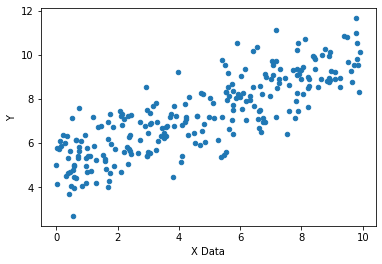

In [15]:
my_data.sample(n=250).plot(kind='scatter',x = 'X Data',y = 'Y')

In [16]:
batch_size = 8

In [17]:
np.random.randn(2)

array([0.53237955, 0.77836218])

In [18]:
m = tf.Variable(0.53237955)
b = tf.Variable(0.77836218)

In [19]:
X_placeholder = tf.placeholder(tf.float32,[batch_size])

In [20]:
y_placeholder = tf.placeholder(tf.float32,[batch_size])

In [21]:
y_model = m * X_placeholder + b

In [22]:
error = tf.reduce_sum(tf.square(y_placeholder - y_model))

In [23]:
optimizer = tf.train.GradientDescentOptimizer(0.001)

In [24]:
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100000
    
    for i in range(epochs):
        
        rand_ind = np.random.randint(len(X_data),size = batch_size)
        
        feed = {X_placeholder: X_data[rand_ind], y_placeholder: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [30]:
model_m

0.48238355

In [31]:
model_b

4.9821095

In [32]:
# y = xm + b
y_hat = X_data * model_m + model_b

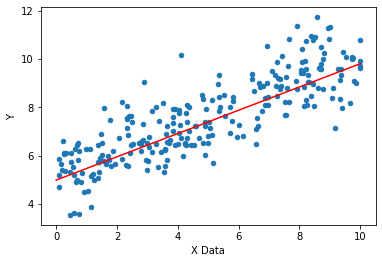

In [33]:
my_data.sample(250).plot(kind='scatter',x = 'X Data', y= 'Y')
plt.plot(X_data,y_hat, 'r')